In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_excel('SoSample3Y.xlsx')

In [3]:
print(df)


    Week Start  Software Bookings
0   2021-08-01         129.808103
1   2021-08-08         122.962071
2   2021-08-15         153.664518
3   2021-08-22         234.772937
4   2021-08-29         214.594944
..         ...                ...
151 2024-06-23         535.647747
152 2024-06-30         255.553305
153 2024-07-07         539.670456
154 2024-07-14         943.907637
155 2024-07-21        2291.493923

[156 rows x 2 columns]


In [4]:
df.head()

,Week Start,Software Bookings
0,2021-08-01,129.808103
1,2021-08-08,122.962071
2,2021-08-15,153.664518
3,2021-08-22,234.772937
4,2021-08-29,214.594944


In [5]:
df.tail()

,Week Start,Software Bookings
151,2024-06-23,535.647747
152,2024-06-30,255.553305
153,2024-07-07,539.670456
154,2024-07-14,943.907637
155,2024-07-21,2291.493923


In [6]:
df.set_index('Week Start',inplace=True)

In [7]:
df.head()

,Software Bookings
Week Start,
2021-08-01,129.808103
2021-08-08,122.962071
2021-08-15,153.664518
2021-08-22,234.772937
2021-08-29,214.594944


In [8]:
df.describe()

,Software Bookings
count,156.000000
mean,308.694304
std,304.876921
min,72.686246
25%,164.056447
50%,213.347536
75%,307.878236
max,2291.493923


In [45]:
#Step 2. Visualize the Data

<Axes: xlabel='Week Start'>

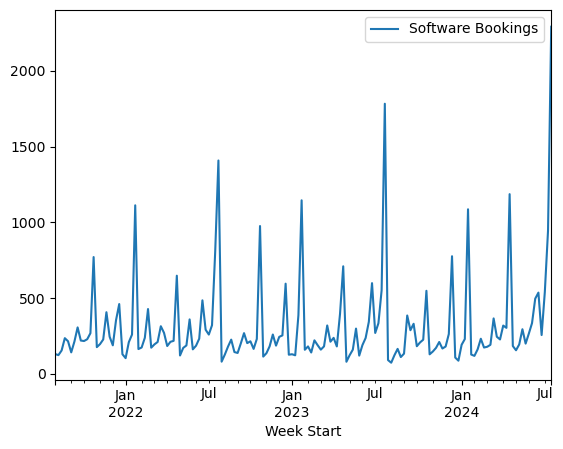

In [9]:
df.plot()

In [10]:
###Testing for Stationarity

from statsmodels.tsa.stattools import adfuller

In [11]:
#Null Hypo: It is non stationary
#Alternate Hypo: It is stationary

def adfuller_test(SoftwareBookings):
    result=adfuller(SoftwareBookings)
    labels=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result,labels):
        print(label+':'+str(value))
    if result[1] <=.05:
        print("Strong evidence against null hypo")
    else:
        print("Weak evidence against null hypo")

In [12]:
adfuller_test(df['Software Bookings'])

ADF Test Statistic:-1.1568022618048963
p-value:0.6918969708384208
#Lags Used:13
Number of Observations Used:142
Weak evidence against null hypo


In [13]:
#### If it is non stationary we have to make it Stationary
### Differencing
df['Seasonal First Difference']=df['Software Bookings']-df['Software Bookings'].shift(13)

In [14]:
df.head(15)

,Software Bookings,Seasonal First Difference
Week Start,,
2021-08-01,129.808103,NaN
2021-08-08,122.962071,NaN
2021-08-15,153.664518,NaN
2021-08-22,234.772937,NaN
2021-08-29,214.594944,NaN
2021-09-05,141.077460,NaN
2021-09-12,212.493876,NaN
2021-09-19,305.957476,NaN
2021-09-26,219.117424,NaN


In [15]:
#### If it is non stationary we have to make it Stationary
### Differencing
df['Seasonal Second Difference']=df['Seasonal First Difference']-df['Seasonal First Difference'].shift(13)

In [16]:
### Again performing adfuller_test
adfuller_test(df['Seasonal Second Difference'].dropna())

ADF Test Statistic:-5.343475516264066
p-value:4.447377768659481e-06
#Lags Used:13
Number of Observations Used:116
Strong evidence against null hypo


<Axes: xlabel='Week Start'>

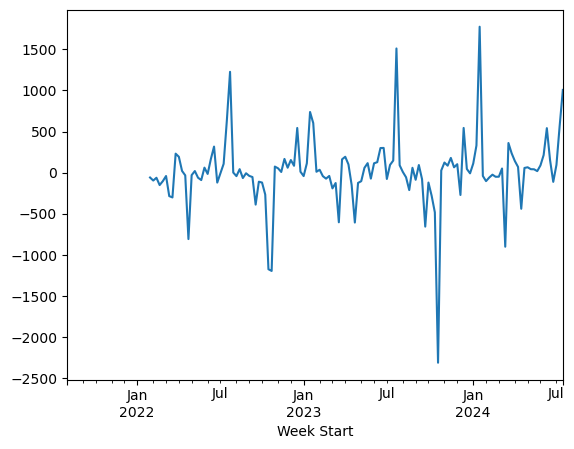

In [17]:
### Now data is stationary as p value is less than .05
df['Seasonal Second Difference'].plot()

In [20]:
#### Auto Regressive Model- Autocorrelation and Partial Autocorrelation

### For non-seasonal data
from statsmodels.tsa.arima_model import ARIMA

In [18]:
#### ARIMA has 3 parts- auto regressive (AR model), differencing and moving average
#### AR Model is done with PACF (Partial Autocorrelation)
### p- AR model lags,d- differencing,q- Moving avg lags
### we have 26 NaN so 27th onwards data is coming
# p=1, q= acf better than pacf as no exponentail decrease =0 or 1, d=1 as 1 time it has been shifted
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Software Bookings'],order=(1,1,1),seasonal_order=(1,1,1,13))

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [19]:
results=model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.09942D+00    |proj g|=  4.00613D-02

At iterate    5    f=  6.08818D+00    |proj g|=  5.38116D-03

At iterate   10    f=  6.08598D+00    |proj g|=  2.00611D-03

At iterate   15    f=  6.04115D+00    |proj g|=  1.33999D-01


 This problem is unconstrained.



At iterate   20    f=  5.97349D+00    |proj g|=  3.27501D-03

At iterate   25    f=  5.96799D+00    |proj g|=  7.17471D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     36      1     0     0   8.319D-06   5.968D+00
  F =   5.9679851465316389     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


<Axes: xlabel='Week Start'>

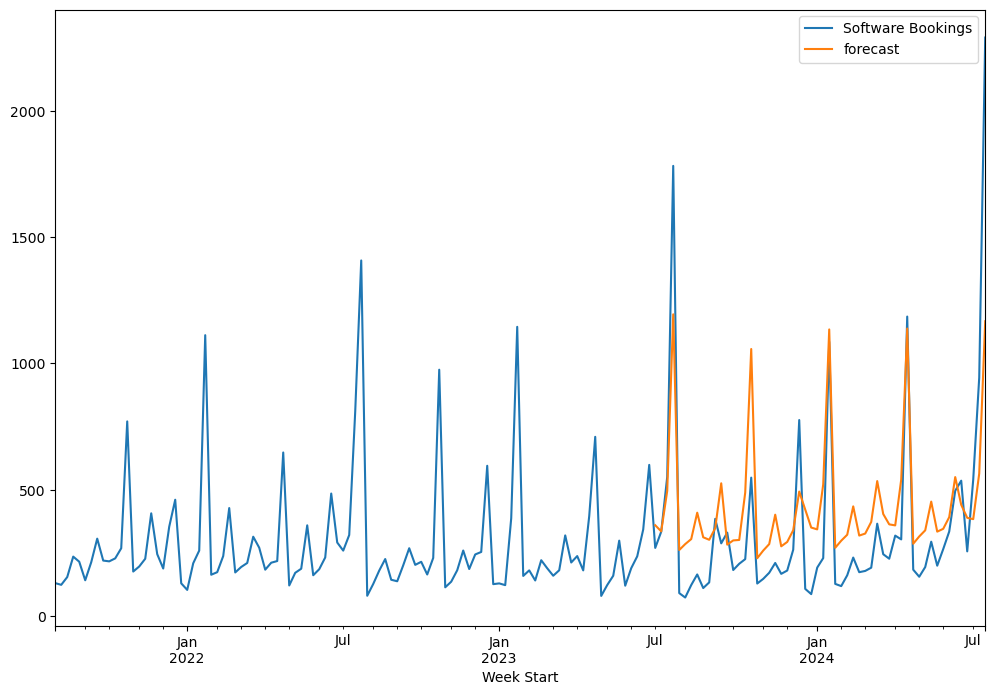

In [24]:
df['forecast']=results.predict(start=100, end = 155, dynamic=True) # testing the model performance with sample input
df[['Software Bookings','forecast']].plot(figsize=(12,8))

In [25]:
### Predicting future forecast
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+DateOffset(weeks=x)for x in range(0,53)] # Creating future weeks- 53 weeks placeholder

In [26]:
future_dataset_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_dataset_df.index.name = 'Week Start'

In [27]:
future_dataset_df.head()

,Software Bookings,Seasonal First Difference,Seasonal Second Difference,forecast
Week Start,,,,
2024-07-28,NaN,NaN,NaN,NaN
2024-08-04,NaN,NaN,NaN,NaN
2024-08-11,NaN,NaN,NaN,NaN
2024-08-18,NaN,NaN,NaN,NaN
2024-08-25,NaN,NaN,NaN,NaN


In [32]:
# fill NaN values with float
future_dataset_df['Software Bookings']= future_dataset_df['Software Bookings'].fillna(0.0)
future_dataset_df['Seasonal First Difference']= future_dataset_df['Seasonal First Difference'].fillna(0.0)
future_dataset_df['Seasonal Second Difference']= future_dataset_df['Seasonal Second Difference'].fillna(0.0)
future_dataset_df['forecast']= future_dataset_df['forecast'].fillna(0.0)
future_dataset_df.head()

,Software Bookings,Seasonal First Difference,Seasonal Second Difference,forecast
Week Start,,,,
2024-07-28,0.0,0.0,0.0,0.0
2024-08-04,0.0,0.0,0.0,0.0
2024-08-11,0.0,0.0,0.0,0.0
2024-08-18,0.0,0.0,0.0,0.0
2024-08-25,0.0,0.0,0.0,0.0


In [34]:
# fill NaN values with float for original dataframe
df['Software Bookings']= df['Software Bookings'].fillna(0.0)
df['Seasonal First Difference']= df['Seasonal First Difference'].fillna(0.0)
df['Seasonal Second Difference']= df['Seasonal Second Difference'].fillna(0.0)
df['forecast']= df['forecast'].fillna(0.0)
df.head()

,Software Bookings,Seasonal First Difference,Seasonal Second Difference,forecast
Week Start,,,,
2021-08-01,129.808103,0.0,0.0,0.0
2021-08-08,122.962071,0.0,0.0,0.0
2021-08-15,153.664518,0.0,0.0,0.0
2021-08-22,234.772937,0.0,0.0,0.0
2021-08-29,214.594944,0.0,0.0,0.0


In [35]:
future_df=pd.concat([df,future_dataset_df])

<Axes: xlabel='Week Start'>

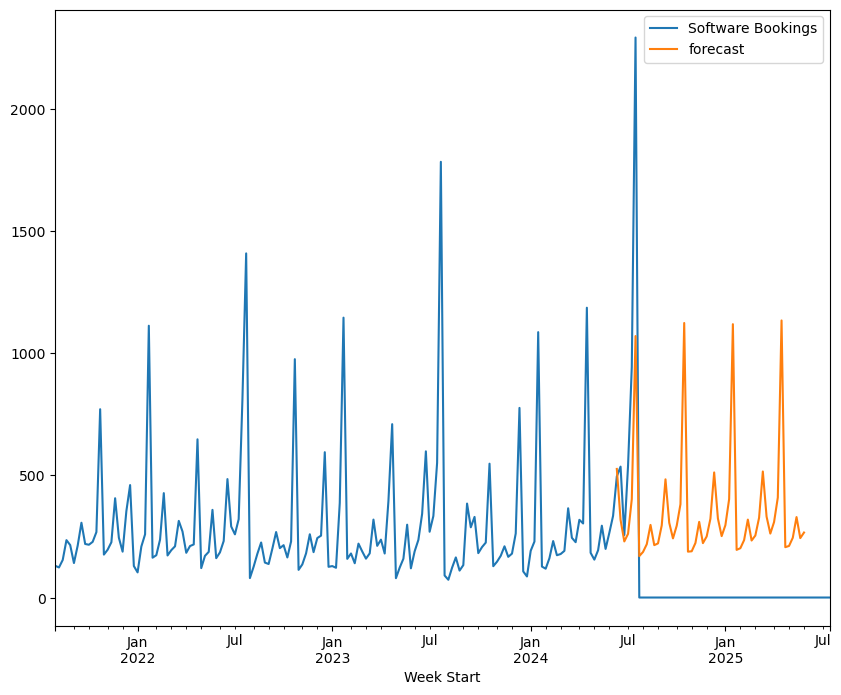

In [38]:
future_df['forecast']=results.predict(start=150, end=200, dynamic=True)
future_df[['Software Bookings','forecast']].plot(figsize=(10,8))

In [39]:
future_df[future_df['forecast'].notna()]

,Software Bookings,Seasonal First Difference,Seasonal Second Difference,forecast
Week Start,,,,
2024-06-16,495.616416,130.451837,541.190792,526.207729
2024-06-23,535.647747,291.331910,153.920846,317.771570
2024-06-30,255.553305,29.123576,-111.133333,229.530654
2024-07-07,539.670456,221.724352,95.021437,260.595610
2024-07-14,943.907637,640.907208,566.886383,402.663187
2024-07-21,2291.493923,1105.631942,1005.687725,1069.843769
2024-07-28,0.000000,0.000000,0.000000,169.440289
2024-08-04,0.000000,0.000000,0.000000,186.472411
2024-08-11,0.000000,0.000000,0.000000,218.146787
